In [1]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\vivek\Anaconda3\envs\chatbot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [3]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents",documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

1015 documents [(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Hey'], 'greeting'), (['Sup'], 'greeting'), (['Whatsup'], 'greeting'), (['Hello', 'there'], 'greeting'), (['Whats', 'up'], 'greeting'), (['Hey', 'there'], 'greeting'), (['hello', 'there'], 'greeting'), (['hi', 'there'], 'greeting'), (['ssup'], 'greeting'), (['sup'], 'greeting'), (['Whats', 'up'], 'greeting'), (['good', 'morning'], 'greeting'), (['good', 'evening'], 'greeting'), (['good', 'afternoon'], 'greeting'), (['help', 'me'], 'greeting'), (['please', 'help', 'me'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Get', 'lost'], 'goodbye'), (['Bubye'], 'goodbye'), (['Bye', 'Bye'], 'goodbye'), (['Tata'], 'goodbye'), (['See', 'you'], 'goodbye'), (['Nice', 'meeting', 'you'], 'goodbye'), (['it', 'was', 'nice', 'talking', 'to', 'you'], 'goodbye'), (['it', 'wa

In [4]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)
#print(output_empty)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    #print(pattern_words)
    
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    #print(pattern_words)
    
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    print(bag)
    
    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(output_row)
    #print(classes)
    print(classes.index(doc[1]))
  
    output_row[classes.index(doc[1])] = 1
    print(output_row)

    training.append([bag, output_row])
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

1
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

51
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
52
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
#print(training)

# create train and test lists
train_x = list(training[:,0])
print(train_x)
print()
print(len(train_x[0]))
print()
train_y = list(training[:,1])
#print(train_y)
print(len(train_y[0]))

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=800, batch_size=8)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 2496      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 60)                540       
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
1015/1015 [==============================] - 1s 563us/step - loss: 4.0183 - acc: 0.0305
Epoch 2/800
1015/1015 [==============================] - 0s 185us/step - loss: 3.7233 - acc: 0.0571
Epoch 3/800
1015/1015 [==============================] - 0s 225us/step -

1015/1015 [==============================] - 0s 169us/step - loss: 0.0254 - acc: 0.9911
Epoch 74/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0223 - acc: 0.9921
Epoch 75/800
1015/1015 [==============================] - ETA: 0s - loss: 0.0268 - acc: 0.990 - 0s 169us/step - loss: 0.0260 - acc: 0.9901
Epoch 76/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0252 - acc: 0.9901
Epoch 77/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0234 - acc: 0.9901
Epoch 78/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0228 - acc: 0.9901
Epoch 79/800
1015/1015 [==============================] - 0s 167us/step - loss: 0.0238 - acc: 0.9882
Epoch 80/800
1015/1015 [==============================] - 0s 171us/step - loss: 0.0223 - acc: 0.9892
Epoch 81/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0238 - acc: 0.9921
Epoch 82/800
1015/1015 [==============================] - 0s 174us

1015/1015 [==============================] - 0s 173us/step - loss: 0.0166 - acc: 0.9892
Epoch 154/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0148 - acc: 0.9901
Epoch 155/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0153 - acc: 0.9892
Epoch 156/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0152 - acc: 0.9921
Epoch 157/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0145 - acc: 0.9911
Epoch 158/800
1015/1015 [==============================] - 0s 175us/step - loss: 0.0171 - acc: 0.9911
Epoch 159/800
1015/1015 [==============================] - 0s 172us/step - loss: 0.0152 - acc: 0.9911
Epoch 160/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0155 - acc: 0.9892
Epoch 161/800
1015/1015 [==============================] - 0s 174us/step - loss: 0.0168 - acc: 0.9892
Epoch 162/800
1015/1015 [==============================] - 0s 169us/step - loss: 0.0161 - acc: 0

1015/1015 [==============================] - 0s 197us/step - loss: 0.0141 - acc: 0.9911
Epoch 234/800
1015/1015 [==============================] - 0s 156us/step - loss: 0.0136 - acc: 0.9892
Epoch 235/800
1015/1015 [==============================] - 0s 164us/step - loss: 0.0139 - acc: 0.9901
Epoch 236/800
1015/1015 [==============================] - 0s 192us/step - loss: 0.0135 - acc: 0.9901
Epoch 237/800
1015/1015 [==============================] - 0s 180us/step - loss: 0.0132 - acc: 0.9911
Epoch 238/800
1015/1015 [==============================] - 0s 183us/step - loss: 0.0141 - acc: 0.9882
Epoch 239/800
1015/1015 [==============================] - 0s 185us/step - loss: 0.0136 - acc: 0.9892
Epoch 240/800
1015/1015 [==============================] - 0s 190us/step - loss: 0.0130 - acc: 0.9911
Epoch 241/800
1015/1015 [==============================] - 0s 165us/step - loss: 0.0133 - acc: 0.9921
Epoch 242/800
1015/1015 [==============================] - 0s 191us/step - loss: 0.0151 - acc: 0

1015/1015 [==============================] - 0s 201us/step - loss: 0.0130 - acc: 0.9901
Epoch 314/800
1015/1015 [==============================] - 0s 171us/step - loss: 0.0135 - acc: 0.9892
Epoch 315/800
1015/1015 [==============================] - 0s 183us/step - loss: 0.0131 - acc: 0.9901
Epoch 316/800
1015/1015 [==============================] - 0s 183us/step - loss: 0.0130 - acc: 0.9911
Epoch 317/800
1015/1015 [==============================] - 0s 180us/step - loss: 0.0126 - acc: 0.9901
Epoch 318/800
1015/1015 [==============================] - 0s 165us/step - loss: 0.0128 - acc: 0.9872
Epoch 319/800
1015/1015 [==============================] - 0s 194us/step - loss: 0.0132 - acc: 0.9882
Epoch 320/800
1015/1015 [==============================] - 0s 183us/step - loss: 0.0134 - acc: 0.9882
Epoch 321/800
1015/1015 [==============================] - 0s 165us/step - loss: 0.0125 - acc: 0.9892
Epoch 322/800
1015/1015 [==============================] - 0s 198us/step - loss: 0.0131 - acc: 0

1015/1015 [==============================] - 0s 197us/step - loss: 0.0121 - acc: 0.9911
Epoch 394/800
1015/1015 [==============================] - 0s 158us/step - loss: 0.0126 - acc: 0.9892
Epoch 395/800
1015/1015 [==============================] - 0s 186us/step - loss: 0.0122 - acc: 0.9911
Epoch 396/800
1015/1015 [==============================] - 0s 184us/step - loss: 0.0121 - acc: 0.9911
Epoch 397/800
1015/1015 [==============================] - 0s 184us/step - loss: 0.0123 - acc: 0.9911
Epoch 398/800
1015/1015 [==============================] - 0s 191us/step - loss: 0.0125 - acc: 0.9901
Epoch 399/800
1015/1015 [==============================] - 0s 184us/step - loss: 0.0123 - acc: 0.9911
Epoch 400/800
1015/1015 [==============================] - 0s 191us/step - loss: 0.0126 - acc: 0.9892
Epoch 401/800
1015/1015 [==============================] - 0s 184us/step - loss: 0.0122 - acc: 0.9892
Epoch 402/800
1015/1015 [==============================] - 0s 185us/step - loss: 0.0120 - acc: 0

1015/1015 [==============================] - 0s 198us/step - loss: 0.0119 - acc: 0.9882
Epoch 474/800
1015/1015 [==============================] - 0s 165us/step - loss: 0.0123 - acc: 0.9882
Epoch 475/800
1015/1015 [==============================] - 0s 191us/step - loss: 0.0123 - acc: 0.9911
Epoch 476/800
1015/1015 [==============================] - 0s 181us/step - loss: 0.0115 - acc: 0.9911
Epoch 477/800
1015/1015 [==============================] - 0s 221us/step - loss: 0.0125 - acc: 0.9911
Epoch 478/800
1015/1015 [==============================] - 0s 195us/step - loss: 0.0123 - acc: 0.9911
Epoch 479/800
1015/1015 [==============================] - 0s 198us/step - loss: 0.0122 - acc: 0.9911
Epoch 480/800
1015/1015 [==============================] - 0s 205us/step - loss: 0.0120 - acc: 0.9882
Epoch 481/800
1015/1015 [==============================] - 0s 202us/step - loss: 0.0118 - acc: 0.9882
Epoch 482/800
1015/1015 [==============================] - 0s 181us/step - loss: 0.0118 - acc: 0

1015/1015 [==============================] - 0s 198us/step - loss: 0.0112 - acc: 0.9892
Epoch 554/800
1015/1015 [==============================] - 0s 189us/step - loss: 0.0116 - acc: 0.9901
Epoch 555/800
1015/1015 [==============================] - 0s 187us/step - loss: 0.0118 - acc: 0.9901
Epoch 556/800
1015/1015 [==============================] - 0s 190us/step - loss: 0.0117 - acc: 0.9892
Epoch 557/800
1015/1015 [==============================] - 0s 184us/step - loss: 0.0124 - acc: 0.9872
Epoch 558/800
1015/1015 [==============================] - 0s 176us/step - loss: 0.0119 - acc: 0.9901
Epoch 559/800
1015/1015 [==============================] - 0s 201us/step - loss: 0.0115 - acc: 0.9901
Epoch 560/800
1015/1015 [==============================] - 0s 195us/step - loss: 0.0116 - acc: 0.9892
Epoch 561/800
1015/1015 [==============================] - 0s 226us/step - loss: 0.0118 - acc: 0.9901
Epoch 562/800
1015/1015 [==============================] - 0s 248us/step - loss: 0.0117 - acc: 0

1015/1015 [==============================] - 0s 194us/step - loss: 0.0172 - acc: 0.9882
Epoch 634/800
1015/1015 [==============================] - 0s 191us/step - loss: 0.0115 - acc: 0.9921
Epoch 635/800
1015/1015 [==============================] - 0s 167us/step - loss: 0.0113 - acc: 0.9872
Epoch 636/800
1015/1015 [==============================] - 0s 180us/step - loss: 0.0116 - acc: 0.9882
Epoch 637/800
1015/1015 [==============================] - 0s 192us/step - loss: 0.0117 - acc: 0.9882
Epoch 638/800
1015/1015 [==============================] - 0s 231us/step - loss: 0.0118 - acc: 0.9911
Epoch 639/800
1015/1015 [==============================] - 0s 237us/step - loss: 0.0117 - acc: 0.9892
Epoch 640/800
1015/1015 [==============================] - 0s 235us/step - loss: 0.0119 - acc: 0.9901
Epoch 641/800
1015/1015 [==============================] - 0s 228us/step - loss: 0.0115 - acc: 0.9892
Epoch 642/800
1015/1015 [==============================] - 0s 229us/step - loss: 0.0118 - acc: 0

1015/1015 [==============================] - 0s 208us/step - loss: 0.0114 - acc: 0.9892
Epoch 714/800
1015/1015 [==============================] - 0s 243us/step - loss: 0.0115 - acc: 0.9882
Epoch 715/800
1015/1015 [==============================] - 0s 256us/step - loss: 0.0114 - acc: 0.9882
Epoch 716/800
1015/1015 [==============================] - 0s 264us/step - loss: 0.0114 - acc: 0.9882
Epoch 717/800
1015/1015 [==============================] - 0s 250us/step - loss: 0.0114 - acc: 0.9882
Epoch 718/800
1015/1015 [==============================] - 0s 237us/step - loss: 0.0115 - acc: 0.9892
Epoch 719/800
1015/1015 [==============================] - 0s 252us/step - loss: 0.0113 - acc: 0.9892
Epoch 720/800
1015/1015 [==============================] - 0s 241us/step - loss: 0.0116 - acc: 0.9892
Epoch 721/800
1015/1015 [==============================] - 0s 247us/step - loss: 0.0117 - acc: 0.9882
Epoch 722/800
1015/1015 [==============================] - 0s 244us/step - loss: 0.0116 - acc: 0

1015/1015 [==============================] - 0s 248us/step - loss: 0.0116 - acc: 0.9882
Epoch 794/800
1015/1015 [==============================] - 0s 243us/step - loss: 0.0117 - acc: 0.9892
Epoch 795/800
1015/1015 [==============================] - 0s 231us/step - loss: 0.0116 - acc: 0.9892
Epoch 796/800
1015/1015 [==============================] - 0s 239us/step - loss: 0.0118 - acc: 0.9901
Epoch 797/800
1015/1015 [==============================] - 0s 245us/step - loss: 0.0114 - acc: 0.9911
Epoch 798/800
1015/1015 [==============================] - 0s 216us/step - loss: 0.0112 - acc: 0.9892
Epoch 799/800
1015/1015 [==============================] - 0s 283us/step - loss: 0.0114 - acc: 0.9892
Epoch 800/800
1015/1015 [==============================] - 0s 229us/step - loss: 0.0111 - acc: 0.9901


In [7]:
print(np.array(train_x))
print(np.array(train_y))
print(history)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
model.save('model_ChatBot.h5')

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

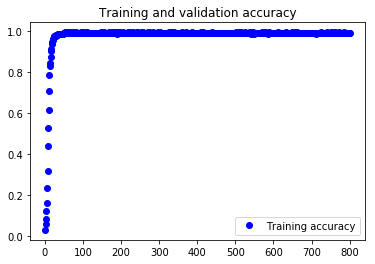

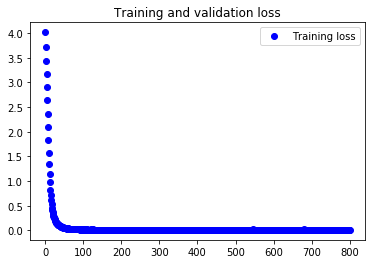

In [16]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    print(sentence_words)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [18]:
p = bow("I would like to know about btech", words)
print (p)
print(words)


['i', 'would', 'lik', 'to', 'know', 'about', 'btech']
found in bag: i
found in bag: would
found in bag: lik
found in bag: to
found in bag: know
found in bag: about
found in bag: btech
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
['!', "'s", '.', 'a', 'about', 'acceiv', 'accommod', 'accredit', 'act', 'address', 'admin', 'admit', 'adv', 'afternoon', 'ai', 'aict', 'al', 'alright', 'am', 'amaz', 'an', 'and', 'any'